## Importando as bibliotecas

In [1]:
import netpixi
from netpixi.integration.gt import Graph
from netpixi.integration.gt import *
import seaborn as sns
from regression.integration.gt import *

import cpnet

from graph_tool import spectral

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


## Criando o grafo

In [2]:
g = Graph(directed=False) # não-dirigido

teste = {}

with open('Github_data.txt', "r") as arquivo:
    arquivo.readline()
    for linha in arquivo:
        try:
            div = linha.split(",")
            topic = div[2]
            user = div[4]
            
            if user in teste.keys():
                teste[user].append(topic) 
            
            if not g.has_vertex(topic):
                g.add_vertex(topic)

            if not g.has_vertex(user):
                g.add_vertex(user)

            g.add_edge(topic, user)
        except:
            continue
print(teste)

{}


## Salvando o grafo

In [3]:
gt_save(g, 'git_hub.net.gz')

## Compilando e renderizando o grafo

In [4]:
g = gt_load('git_hub.net.gz')
r = netpixi.render('git_hub.net.gz')

## Melhorando visualmento o grafo

In [5]:
# mudar a cor de fundo do grafo
r.graph(color=0xffffff)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color=0x000000, size=10)

# mudar um vértice específico a partir de seu id
r.vertex(0, color=0xff0000, size=20)
r.vertex(1, color=0xff0000, size=20)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x000000, width=1, curve1=1, curve2=1)

## Análise exploratória do grafo

In [6]:
# Números de vértices

n = g.num_vertices()
n

1224

In [7]:
# Número de arestas

m = g.num_edges()
m

1351

In [8]:
# Número máximo possível de arestas

if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
max_edges

748476

In [9]:
# Densidade

d = m / max_edges
d

0.0018050010955595103

In [10]:
# Propriedades de cada vértice

data = gt_data(g)

# Degree

degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())
    
data['degree'] = degrees
data

,degree
id,
Data-Science,92
keras-team,2
scikit-learn,2
jakevdp,1
CamDavidsonPilon,1
...,...
methylDragon,1
kprimice,1
androidthings,1


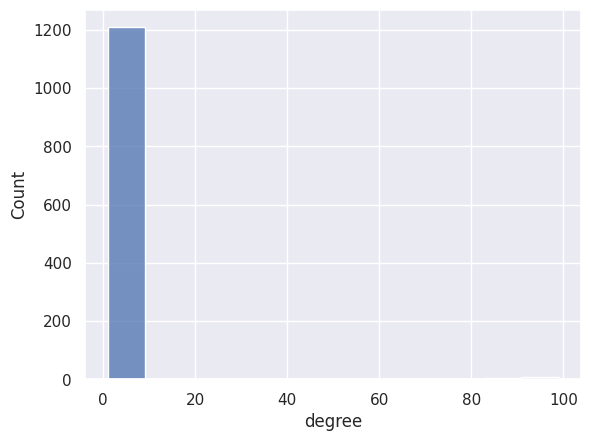

In [11]:
# Histograma do degree

sns.histplot(data['degree']);

## Limpando o grafo

In [12]:
g = gt_clean(g)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'david.net.gz')
netpixi.render('david.net.gz', infinite=True);